## Bank Marketing Data Analysis

## loading data and requiered libraries
Dataset
In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).
We need to take ```bank/bank-full.csv``` file from the downloaded zip-file.

In [190]:
url_homework = 'https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/03-classification/homework.md#target-encoding'

In [191]:
#  import pandas, numpy and ...
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [192]:
# download and load data
df = pd.read_csv('bank-full.csv', sep=';')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [193]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Preparation
```age```,
```job```,
```marital```,
```education```,
```balance```,
```housing```,
```contact```,
```day```,
```month```,
```duration```,
```campaign```,
```pdays```,
```previous```,
```poutcome```,



*   Select only the features from above.
*   Check if the missing values are presented in the features.


In [194]:
features = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

df_select_feature  = df[features]
df_select_feature.isnull().sum()

,0
age,0
job,0
marital,0
education,0
balance,0
housing,0
contact,0
day,0
month,0
duration,0


In [195]:
df_select_feature.dtypes

,0
age,int64
job,object
marital,object
education,object
balance,int64
housing,object
contact,object
day,int64
month,object
duration,int64


In [196]:
# prompt: find the unique values in column 'y

(df_select_feature['y'] == 'no').sum()


39922

In [197]:
numeric = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [198]:
df_select_feature.nunique()

,0
age,77
job,12
marital,3
education,4
balance,7168
housing,2
contact,3
day,31
month,12
duration,1573


##Question 1
What is the most frequent observation (mode) for the column ```education```?

* ```unknown```
* ```primary```
* ```secondary```
* ```tertiary```

In [199]:
df_select_feature['education'].mode()

,education
0,secondary


Text(0.5, 1.0, 'Distribution of preducation')

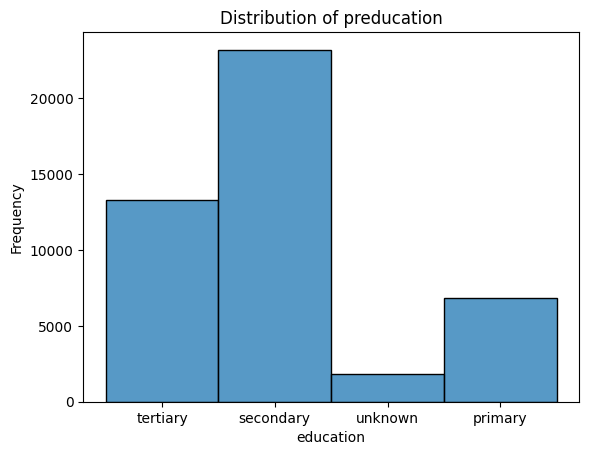

In [200]:
# Looking at the educatione variable
# You can see the most frequent value in education as well as the others
sns.histplot(df_select_feature.education, bins=25)
plt.ylabel('Frequency')
plt.xlabel('education')
plt.title('Distribution of preducation')

## Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

* ```age``` and ```balance```
* ```day``` and ```campaign```
* ```day``` and ```pdays```
* ```pdays``` and ```previous```

In [201]:
numeric = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_numeric = df_select_feature[numeric]

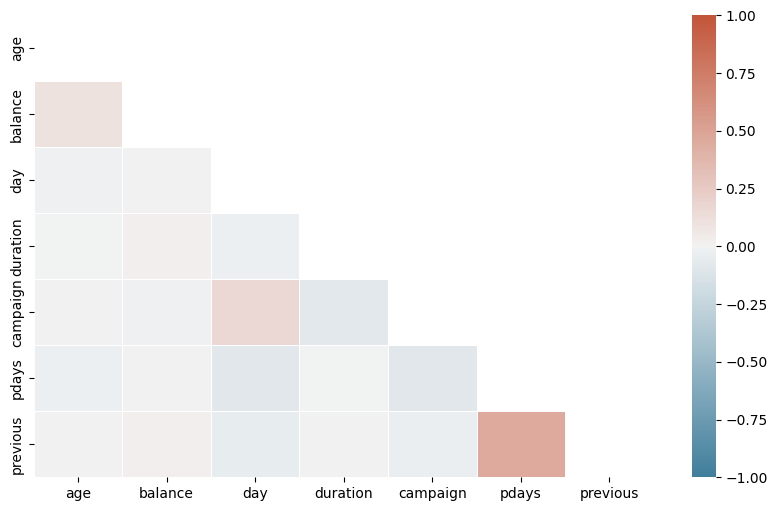

In [202]:
plt.figure( figsize=(10, 6))
mask = np.triu( np.ones_like(df_select_feature.corr(numeric_only=True), dtype=bool))
cmap = sns.diverging_palette(230, 20 , as_cmap=True)

heatmap = sns.heatmap(
    df_select_feature.corr(numeric_only=True),
    mask=mask,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    # annot=True,
    linewidth=0.5
)

## Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.




In [203]:
df_full = df_select_feature.copy()
df_full['y'] = (df_select_feature['y'] == 'yes').astype('int')

# checking the result:
np.column_stack((df_select_feature['y'], df_full['y']))

array([['no', 0],
       ['no', 0],
       ['no', 0],
       ...,
       ['yes', 1],
       ['no', 0],
       ['no', 0]], dtype=object)

## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_features = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
]


df_X = df[X_features]
df_Y = df['y']

# split data and form test data
X_full_train, X_test , Y_full_train, Y_test = train_test_split(df_X, df_Y,
                                                               test_size=0.2,
                                                               random_state=42)

# split data into train and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_full_train, Y_full_train,
                                                  test_size=0.25, random_state=42)


In [206]:
type(X_train)

pandas.core.frame.DataFrame

## Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`

In [207]:
from sklearn.metrics import mutual_info_score

In [208]:
def mutual_info_churn_score( data):
  return mutual_info_score(data, Y_train)

In [209]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job','marital','education','housing','contact','month','poutcome']

In [210]:
X_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

,0
poutcome,0.029533
month,0.025090
contact,0.013356
housing,0.010343
job,0.007316
education,0.002697
marital,0.002050


## Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.



In [211]:
from sklearn.feature_extraction import DictVectorizer    # It vectorizes dictionaries

In [212]:
# one-hot encoding and categorical variables


## numerical and categorical variables
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job','marital','education','housing','contact','month','poutcome']

## one-hot endocding for training data
train_dicts = X_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv = dv.fit(train_dicts)
X_train_cat_num = dv.transform(train_dicts)   # or fit_transform
print(X_train_cat_num )
print()
train_dicts[1]

[[3.200e+01 1.100e+03 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.800e+01 0.000e+00 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [4.900e+01 3.309e+03 2.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [5.400e+01 0.000e+00 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.500e+01 2.311e+03 2.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.000e+01 1.500e+01 2.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]]



{'job': 'entrepreneur',
 'marital': 'married',
 'education': 'secondary',
 'housing': 'yes',
 'contact': 'cellular',
 'month': 'nov',
 'poutcome': 'unknown',
 'age': 38,
 'balance': 0,
 'day': 17,
 'duration': 258,
 'campaign': 1,
 'pdays': -1,
 'previous': 0}

In [213]:
type(X_train[categorical + numerical])

pandas.core.frame.DataFrame

In [214]:
## one-hot encoding for validation data
val_dicts = X_val[categorical + numerical].to_dict(orient='records')
dv = dv.fit(val_dicts)
X_val_cat_num = dv.transform(val_dicts)   # or fit_transform

* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`

In [215]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_cat_num, Y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9

In [216]:
model.coef_.round(3)

array([[ 1.000e-03,  0.000e+00, -7.800e-02,  2.540e-01,  8.300e-02,
        -1.313e+00,  9.000e-03,  4.000e-03, -4.440e-01, -2.510e-01,
        -5.300e-02, -2.290e-01, -1.460e-01, -8.310e-01,  9.800e-02,
        -2.440e-01, -2.640e-01, -3.320e-01, -8.000e-02,  2.650e-01,
        -2.920e-01, -1.290e-01,  2.880e-01, -1.460e-01,  3.300e-02,
        -1.730e-01, -3.520e-01, -4.760e-01, -1.490e-01, -1.300e-02,
        -7.110e-01,  3.900e-01, -3.260e-01, -1.162e+00, -1.044e+00,
         2.990e-01,  1.453e+00, -5.020e-01, -9.400e-01,  7.840e-01,
         7.950e-01, -1.000e-03, -7.840e-01, -5.800e-01,  1.500e+00,
        -1.112e+00,  5.000e-03]])

In [238]:
model.predict(X_train_cat_num[:20])   # Hard predictinos because we already have the answer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [237]:
print(model.predict_proba(X_val_cat_num).shape)
print(Y_val.shape)
# first col: the probability of being in the negative class
# second col: the probability of being in the positive class
y_pred = model.predict_proba(X_val_cat_num)[:, 1]
y_pred # Soft predictions

(7234, 2)
(7234,)


array([0.01408564, 0.00994265, 0.16630537, ..., 0.66563484, 0.03476051,
       0.85449166])

In [239]:
dicision=model.predict(X_val_cat_num)   # Hard predictinos because we already have the answer

In [248]:
accuracy = (Y_val == dicision).mean()
accuracy

0.900331766657451

## Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.


In [269]:
# load data
df = pd.read_csv('bank-full.csv', sep=';')
columns = df.columns
# print(df.columns)
diff_dict = dict([])

for col in ['age', 'balance', 'marital', 'previous']:
    df_X = df.copy()
    df_X = df_X.drop(columns=['y', col])
    df_y = df['y']
    # print(df_X.columns)
    #===========================================================================
    # SPLIT DATA
    #===========================================================================
    # split data and form test data
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(df_X, df_y,
                                                                test_size=0.2,
                                                                random_state=42)
    # split data into train and validation
    X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val,
                                                                test_size=0.2,
                                                                random_state=42)
    #===========================================================================
    # PREPARING CATEGORICAL DATA USING ONE-HOT ENCODING
    #===========================================================================

    # one-hot endocding for training data
    train_dicts = X_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv = dv.fit(train_dicts)
    X_train_cat_num = dv.transform(train_dicts)   # or fit_transform

    # one-hot encoding for validation data
    val_dicts = X_val.to_dict(orient='records')
    dv = dv.fit(val_dicts)
    X_val_cat_num = dv.transform(val_dicts)

    #===========================================================================
    # TRAINING THE MODEL
    #===========================================================================
    model =LogisticRegression(solver='liblinear', C=1.0, max_iter=1000,
                              random_state=42)
    model.fit(X_train_cat_num, Y_train)

    #===========================================================================
    # PREDICTION
    #===========================================================================

    dicision = model.predict(X_val_cat_num)   # Hard predictinos
    diff_dict[col]= np.abs((Y_val == dicision).mean() - accuracy)



Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


{'age': 0.00027647221454241144,
 'balance': 0.0001382361072711502,
 'marital': 0.0016588332872545797,
 'previous': 0.00013823610727126123}

In [275]:
# finding smallest difference
min_val = float('inf')
feature_min = ''
for key, value in diff_dict.items():
    if value < min_val:
      min_val = value
      feature_min = key
print(min_val, feature_min)

0.0001382361072711502 balance



## Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [279]:
# load data
df = pd.read_csv('bank-full.csv', sep=';')
columns = df.columns
# print(df.columns)
accuracy_dict = dict([])

for C in [0.01, 0.1, 1, 10, 100]:
    df_X = df.copy()
    df_X = df_X.drop(columns=['y'])
    df_y = df['y']
    # print(df_X.columns)
    #===========================================================================
    # SPLIT DATA
    #===========================================================================
    # split data and form test data
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(df_X, df_y,
                                                                test_size=0.2,
                                                                random_state=42)
    # split data into train and validation
    X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val,
                                                                test_size=0.2,
                                                                random_state=42)
    #===========================================================================
    # PREPARING CATEGORICAL DATA USING ONE-HOT ENCODING
    #===========================================================================

    # one-hot endocding for training data
    train_dicts = X_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv = dv.fit(train_dicts)
    X_train_cat_num = dv.transform(train_dicts)   # or fit_transform

    # one-hot encoding for validation data
    val_dicts = X_val.to_dict(orient='records')
    dv = dv.fit(val_dicts)
    X_val_cat_num = dv.transform(val_dicts)

    #===========================================================================
    # TRAINING THE MODEL
    #===========================================================================
    model =LogisticRegression(solver='liblinear', C=C, max_iter=1000,
                              random_state=42)
    model.fit(X_train_cat_num, Y_train)

    #===========================================================================
    # PREDICTION
    #===========================================================================

    dicision = model.predict(X_val_cat_num)   # Hard predictinos
    accuracy_dict[C]= (Y_val == dicision).mean()


In [281]:

# finding the best accurcy
max_val = 0
accuracy_val = ''
for key, value in diff_dict.items():
    if value > max_val:
      max_val = value
      accuracy_val = key
print(max_val, accuracy_val)

0.9011611833010782 10


In [278]:
diff_dict

{0.01: 0.8988111694774675,
 0.1: 0.9001935305501797,
 1: 0.900331766657451,
 10: 0.9011611833010782,
 100: 0.9006082388719934}

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw03
* If your answer doesn't match options exactly, select the closest one